---
### 2. 신용카드/할부 결제를 선호하는 고객은 <span style="color:red;">특정 카테고리에서</span> 고가 제품을 구매할 것이다.
&nbsp; <span style="color:red;">**→ (특정) 카테고리별로 비교 분석하여, 결과를 보고나서 적당한 가설 설정 예정**</span>

- 2_merged (병합만 한 상태)
- 2_merged_outlier (이상치 처리 완료)
- 2_missing_value_outlier (결측치 처리완료)
---

In [62]:
# 모든 경고 무시 :   
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

**① Customers Dataset:<br>
    information about the customer and its location(고객 id, 고객 도시, 고객 주, 우편번호 등)**
    
**② Geolocation Dataset:<br>
    information Brazilian zip codes and its lat/lng coordinates(위도, 경도, 도시, 주 등)**
    
**③ Order Items Dataset:<br>
   about the items purchased within each order(물건 id, 판매자 id, 배송기한, 가격, 배송료 등)**
   
**④ olist_order_payments_dataset:<br>
   about the orders payment options(결제 유형, 일시불/할부, 결제 금액 등)**
   
**⑤ Order Reviews Dataset:<br>
   about the reviews made by the customers(리뷰 전반)**
   
**⑥ olist_orders_dataset:<br>
   핵심 테이블. (주문일자, 주문id, 고객id, 배송현황, 구매 일자, 배송 일자 등)**
   
**⑦ olist_products_dataset:<br>
   about the products sold by Olist(상품 전반)**
   
**⑧ olist_sellers_dataset:<br>
   about the sellers that fulfilled orders made at Olist(판매자 id, 판매자 우편번호, 판매자 도시, 판매자 주)**
   
**⑨ product_category_name_translation:<br>
   Translates the product_category_name to english(브라질어, 영어)**

In [3]:
#① Customers Dataset:
#information about the customer and its location(고객 id, 고객 도시, 고객 주, 우편번호 등)

customers = pd.read_csv('../data/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# 고유값 개수  →  * value_counts()

#1. customer_id
no_id = customers["customer_id"].value_counts()
# customer_id, Length: 99,441

#2. customer_unique_id
uni_id = customers["customer_unique_id"].value_counts()
# customer_unique_id, Length: 96,096

#3. customer_zip_code_prefix
no_zip = customers["customer_zip_code_prefix"].value_counts()
# customer_zip_code_prefix, Length: 14994

len(no_id), len(uni_id), len(no_zip)

(99441, 96096, 14994)

In [5]:
import pandas as pd

# ② Geolocation Dataset:
# information Brazilian zip codes and its lat/lng coordinates(위도, 경도, 도시, 주 등)
geolocation = pd.read_csv('../data/olist_geolocation_dataset.csv')

geolocation.head()
## 1000163 rows × 5 columns

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
#③ Order Items Dataset:
#about the items purchased within each order(물건 id, 판매자 id, 배송기한, 가격, 배송료 등)

order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
order_items.head()
## 112650 rows × 7 columns

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
#④ olist_order_payments_dataset:
#about the orders payment options(결제 유형, 일시불/할부, 결제 금액 등)

order_payments = pd.read_csv('../data/olist_order_payments_dataset.csv')
order_payments.head()
## 103886 rows × 5 columns

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
#⑥ olist_orders_dataset:
#핵심 테이블. (주문일자, 주문id, 고객id, 배송현황, 구매 일자, 배송 일자 등)
orders = pd.read_csv('../data/olist_orders_dataset.csv')

orders.head()
## 99441 rows × 8 columns

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# 2. 신용카드/할부 결제를 선호하는 고객은 특정 카테고리에서 고가 제품을 구매할 것이다. (성철)
# - 1. 하나로 묶기
# - 2. 제거는 상의

import pandas as pd

# Load the datasets
orders = pd.read_csv('../data/olist_orders_dataset.csv') # ⑥
customers = pd.read_csv('../data/olist_customers_dataset.csv') # ①
order_payments = pd.read_csv('../data/olist_order_payments_dataset.csv')  # ④ 
order_items = pd.read_csv('../data/olist_order_items_dataset.csv') # ③ 

In [10]:
# Merge orders with customers on 'customer_id'
merged_df = orders.merge(customers, on='customer_id', how='left')

# Merge the result with payments on 'order_id'
merged_df = merged_df.merge(order_payments, on='order_id', how='left')

# Finally, merge with order_items on 'order_id'
merged_df2 = merged_df.merge(order_items, on='order_id', how='left')

# Display the merged dataframe
merged_df2.head()  ## 5 rows × 22 columns

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


② olist_customers_dataset  (99441 rows × 5 columns)
   - information Brazilian zip codes and its lat/lng coordinates (위도, 경도, 도시, 주 등)

In [12]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
# 병합된 데이터프레임을 CSV 파일로 저장
merged_df2.to_csv('2_merged_df.csv', index=False)

In [17]:
# Load <병합된 데이터프레임> merged_df2.csv
df2 = pd.read_csv('2_merged_df.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   customer_unique_id             118434 non-null  object 
 9   customer_zip_code_prefix       118434 non-null  int64  
 10  customer_city                  118434 non-null  object 
 11  customer_state                 118434 non-null  object 
 12  payment_sequential            

In [18]:
df2.head()
## 118434 rows × 22 columns

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [19]:
df2[df2['order_item_id'].isna()==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 319 to 118403
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       830 non-null    object 
 1   customer_id                    830 non-null    object 
 2   order_status                   830 non-null    object 
 3   order_purchase_timestamp       830 non-null    object 
 4   order_approved_at              669 non-null    object 
 5   order_delivered_carrier_date   1 non-null      object 
 6   order_delivered_customer_date  0 non-null      object 
 7   order_estimated_delivery_date  830 non-null    object 
 8   customer_unique_id             830 non-null    object 
 9   customer_zip_code_prefix       830 non-null    int64  
 10  customer_city                  830 non-null    object 
 11  customer_state                 830 non-null    object 
 12  payment_sequential             830 non-null  

**1. 소비자 행동 분석**<br>
   <span style="color:red;">① 고객 세분화:</span><br>
&nbsp; &nbsp; &nbsp; - 구매 이력, 방문 패턴, 선호도 등을 기반으로 고객을 그룹화하여  <span style="color:red;">맞춤형 마케팅 전략.</span><br>
    <span style="color:green;">**② 재구매율 및 이탈 분석:**</span><br>
&nbsp; &nbsp; &nbsp; - 반복 구매 여부나 고객 이탈 원인을 파악해  <span style="color:green;">**충성 고객**</span>을 늘리는 전략.
       
**2. 판매 및 트렌드 분석**<br>
  <span style="color:green;">**① 시계열 분석:**</span><br>
&nbsp; &nbsp; &nbsp; - 일, 주, 월별 판매 데이터를 분석해 시즌별 트렌드와 패턴을 식별.<br>
  ② 상품군별 인기 분석:<br>
&nbsp; &nbsp; &nbsp; - 어떤 상품이 어느 기간에 인기가 있는지 파악하여 재고 관리 및 프로모션 전략에 반영.<br>
      
**3. 마켓 바스켓(연관관계) 분석**<br>
&nbsp; &nbsp; &nbsp; - 함께 구매되는 상품 조합을 분석해 크로스셀링이나 업셀링 전략,  <span style="color:green;">**추천 시스템**</span>에 활용.

In [22]:

merged_df2 = merged_df.merge(order_items, on='order_id', how='left')


In [23]:
# 'customer_zip_code_prefix'  →  'zip_code'

df3 = df2.copy()
df3.rename(columns={'customer_zip_code_prefix': 'zip_code'}, inplace=True)

df3.head()
## 118434 rows × 22 columns

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [24]:
geo = geolocation.copy()
zip_change = {'geolocation_zip_code_prefix': 'geo_code',
              'geolocation_lat':'lat',
              'geolocation_lng':'lng',
              'geolocation_city':'city',
              'geolocation_state':'state'
             }

geo.rename(zip_change, axis=1, inplace=True)
geo.sort_values(by='geo_code', ascending=True)
## 1000,163 rows × 5 columns

,geo_code,lat,lng,city,state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
...,...,...,...,...,...
1000026,99980,-28.388679,-51.848863,david canabarro,RS
999950,99980,-28.388400,-51.845225,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [25]:
geo['geo_code'].value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
71750       1
71742       1
26475       1
26357       1
29826       1
Name: geo_code, Length: 19015, dtype: int64

In [26]:
#zip = geo.groupby('geo_code')[['lat','lng']].sum().mean()

# geo_code별로 lat와 lng의 평균값을 계산
geo_mean = geo.groupby('geo_code')[['lat', 'lng']].mean()
geo_mean

,lat,lng
geo_code,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99960,-27.953722,-52.025511
99965,-28.183372,-52.039850
99970,-28.343766,-51.874689


In [27]:
# ⑧ olist_sellers_dataset:
# about the sellers that fulfilled orders made at Olist
# (판매자 id, 판매자 우편번호, 판매자 도시, 판매자 주)

sellers = pd.read_csv('../data/olist_sellers_dataset.csv')
sellers.head()
## 3095 rows × 4 columns

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
df3['customer_id'].value_counts()

270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
63b964e79dee32a3587651701a2b8dbf    24
                                    ..
595db1a58f8b33d7c1358fc3d894c1a4     1
741a12b94b48a426f2cbd87b83a62c29     1
7fb28b72559f15550a82e040b117dcc6     1
d75f7a65c23672520fa4dc4125443ff9     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length: 99441, dtype: int64

In [30]:
# 【 rename() 】

cname_change = {
    'customer_id':'id',
    'order_purchase_timestamp':'order_date',
    'payment_sequential':'pay_state',
    'payment_type':'pay_type'}

df3.rename(cname_change, axis=1, inplace=True)

In [31]:

df_model = df3[['id','order_date','zip_code','product_id','pay_state','pay_type','price','freight_value']]

df_model.head()
## 118434 rows × 8 columns

,id,order_date,zip_code,product_id,pay_state,pay_type,price,freight_value
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,1.0,credit_card,29.99,8.72
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,3.0,voucher,29.99,8.72
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,2.0,voucher,29.99,8.72
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,595fac2a385ac33a80bd5114aec74eb8,1.0,boleto,118.70,22.76
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,75265,aa4383b373c6aca5d8797843e5594415,1.0,credit_card,159.90,19.22


In [33]:
#⑨ product_category_name_translation:
#Translates the product_category_name to english(브라질어, 영어)

category = pd.read_csv('../data/product_category_name_translation.csv')
category

## 71 rows × 2 columns

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [34]:
#⑦ olist_products_dataset:
#about the products sold by Olist(상품 전반)

products = pd.read_csv('../data/olist_products_dataset.csv')

products.head()
## 32951 rows × 9 columns

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [35]:
products = products.merge(category, on='product_category_name', how='left')
products.head()

## 32951 rows × 11 columns

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [36]:
p_category = products[['product_id','product_category_name','product_category_name_english']]

p_category.head()
## 32951 rows × 3 columns

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [37]:
df_model.head() ## 118,434 rows × 8 columns

,id,order_date,zip_code,product_id,pay_state,pay_type,price,freight_value
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,1.0,credit_card,29.99,8.72
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,3.0,voucher,29.99,8.72
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,2.0,voucher,29.99,8.72
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,595fac2a385ac33a80bd5114aec74eb8,1.0,boleto,118.70,22.76
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,75265,aa4383b373c6aca5d8797843e5594415,1.0,credit_card,159.90,19.22


In [38]:
df_model = df_model.merge(p_category, on='product_id', how='left')

df_model.head()
## 118,434 rows × 10 columns

,id,order_date,zip_code,product_id,pay_state,pay_type,price,freight_value,product_category_name,product_category_name_english
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,1.0,credit_card,29.99,8.72,utilidades_domesticas,housewares
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,3.0,voucher,29.99,8.72,utilidades_domesticas,housewares
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,2.0,voucher,29.99,8.72,utilidades_domesticas,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,595fac2a385ac33a80bd5114aec74eb8,1.0,boleto,118.70,22.76,perfumaria,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,75265,aa4383b373c6aca5d8797843e5594415,1.0,credit_card,159.90,19.22,automotivo,auto


In [39]:
cname_change = {
    'product_category_name_english_y':'category',
    'freight_value':'freight'}

df_model.rename(cname_change, axis=1, inplace=True)

df_model.head()
## 118,434 rows × 12 columns

,id,order_date,zip_code,product_id,pay_state,pay_type,price,freight,product_category_name,product_category_name_english
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,1.0,credit_card,29.99,8.72,utilidades_domesticas,housewares
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,3.0,voucher,29.99,8.72,utilidades_domesticas,housewares
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,2.0,voucher,29.99,8.72,utilidades_domesticas,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,595fac2a385ac33a80bd5114aec74eb8,1.0,boleto,118.70,22.76,perfumaria,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,75265,aa4383b373c6aca5d8797843e5594415,1.0,credit_card,159.90,19.22,automotivo,auto


In [40]:
# 【 drop() 】  - 열 삭제

# 'product_category_name' 열 삭제
col_del = ['product_category_name']

# Drop the specified columns
df_model.drop(col_del, axis=1, inplace=True)

In [41]:
# 【 rename() 】

cname_change = {
    'product_category_name_english':'category'}

df_model.rename(cname_change, axis=1, inplace=True)

In [42]:
df_model.head()
## 118,434 rows × 9 columns

,id,order_date,zip_code,product_id,pay_state,pay_type,price,freight,category
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,1.0,credit_card,29.99,8.72,housewares
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,3.0,voucher,29.99,8.72,housewares
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,87285b34884572647811a353c7ac498a,2.0,voucher,29.99,8.72,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,595fac2a385ac33a80bd5114aec74eb8,1.0,boleto,118.70,22.76,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,75265,aa4383b373c6aca5d8797843e5594415,1.0,credit_card,159.90,19.22,auto


In [43]:
df_model['category'].describe()

count             115881
unique                71
top       bed_bath_table
freq               11823
Name: category, dtype: object

In [44]:
len(df_model['category'])

118434

In [48]:
# 카테고리 별 총 주문금액 (* 내림차순)
group_price = df_model.groupby('category')['price'].sum().sort_values(ascending=False)
group_price

category
health_beauty                1297490.77
watches_gifts                1253143.30
bed_bath_table               1092551.02
sports_leisure               1023996.34
computers_accessories         942277.57
                                ...    
flowers                         1110.04
home_comfort_2                   773.17
cds_dvds_musicals                730.00
fashion_childrens_clothes        569.85
security_and_services            283.29
Name: price, Length: 71, dtype: float64

In [77]:
group_count = df_model['category'].value_counts()

group_count

bed_bath_table               11823
health_beauty                 9975
sports_leisure                8945
furniture_decor               8744
computers_accessories         8082
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: category, Length: 71, dtype: int64

In [215]:
type(group_price), type(group_count)

(pandas.core.series.Series, pandas.core.series.Series)

In [49]:
price_idx = group_price.index

In [52]:
count_idx = group_count.index

In [53]:
# 카테고리 별 (총 주문금액, 총 주문량) : group_price + group_count

series_sum = [group_price, group_count]
group_merged = pd.concat(series_sum, axis=1)
group_merged

,price,category
health_beauty,1297490.77,9975
watches_gifts,1253143.30,6201
bed_bath_table,1092551.02,11823
sports_leisure,1023996.34,8945
computers_accessories,942277.57,8082
...,...,...
flowers,1110.04,33
home_comfort_2,773.17,31
cds_dvds_musicals,730.00,14
fashion_childrens_clothes,569.85,8


In [64]:
group_merged.rename({'category':'count'}, axis=1, inplace=True)
group_merged

,price,count
health_beauty,1297490.77,9975
watches_gifts,1253143.30,6201
bed_bath_table,1092551.02,11823
sports_leisure,1023996.34,8945
computers_accessories,942277.57,8082
...,...,...
flowers,1110.04,33
home_comfort_2,773.17,31
cds_dvds_musicals,730.00,14
fashion_childrens_clothes,569.85,8


In [82]:
group_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, health_beauty to security_and_services
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   71 non-null     float64
 1   count   71 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 3.7+ KB


In [88]:
# 카테고리 별 (평균 주문금액) :  (price / count)

group_merged['avg_price'] = \
group_merged.apply(lambda row: round(row['price'] / row['count'], 1), axis=1)
group_merged

,price,count,avg_price
health_beauty,1297490.77,9975,130.1
watches_gifts,1253143.30,6201,202.1
bed_bath_table,1092551.02,11823,92.4
sports_leisure,1023996.34,8945,114.5
computers_accessories,942277.57,8082,116.6
...,...,...,...
flowers,1110.04,33,33.6
home_comfort_2,773.17,31,24.9
cds_dvds_musicals,730.00,14,52.1
fashion_childrens_clothes,569.85,8,71.2


In [105]:
# 조건에 맞는 카테고리 추출 : (평균 단가 > 100 & 구매 수량 > 1000)

cut_price = 100   # 평균 단가 (avg_price)
cut_count = 1000  # 구매 수량 (count)

selected = group_merged[(group_merged['avg_price']>cut_price) & (group_merged['count']>cut_count)]

selected  # 선정하는조건에 따른다.

,price,count,avg_price
health_beauty,1297490.77,9975,130.1
watches_gifts,1253143.30,6201,202.1
sports_leisure,1023996.34,8945,114.5
computers_accessories,942277.57,8082,116.6
cool_stuff,662309.49,3987,166.1
auto,616752.51,4379,140.8
garden_tools,518217.54,4574,113.3
toys,500295.09,4273,117.1
baby,434479.61,3196,135.9
perfumery,412754.81,3560,115.9


In [ ]:
## [최종] 2_missing_value_outlier (결측치 처리완료)

2_missing_value_outlier = df_model.copy()  # 데이터 셋


In [ ]:
## [최종] 회귀분석 데이터 : 카테고리 별 (총 주문금액, 총 주문량, 평균 주문금액) 

group_merged    # 데이터 셋 (for Graph)


In [201]:
# 카테고리 별  주문량

nn=20 # 선택할 상위 카테고리 숫자

group_count = df_model['category'].value_counts()[:nn]
group_count

bed_bath_table              11823
health_beauty                9975
sports_leisure               8945
furniture_decor              8744
computers_accessories        8082
housewares                   7355
watches_gifts                6201
telephony                    4721
garden_tools                 4574
auto                         4379
toys                         4273
cool_stuff                   3987
perfumery                    3560
baby                         3196
electronics                  2845
stationery                   2617
fashion_bags_accessories     2151
pet_shop                     2028
office_furniture             1778
consoles_games               1191
Name: category, dtype: int64

In [203]:
for idx,(val, cnt) in enumerate(group_count.iteritems(), 1):
    if idx>=10:
        print("Top", idx, ":", val, cnt)
    else:
        print("Top", idx, " :", val, cnt)

Top 1  : bed_bath_table 11823
Top 2  : health_beauty 9975
Top 3  : sports_leisure 8945
Top 4  : furniture_decor 8744
Top 5  : computers_accessories 8082
Top 6  : housewares 7355
Top 7  : watches_gifts 6201
Top 8  : telephony 4721
Top 9  : garden_tools 4574
Top 10 : auto 4379
Top 11 : toys 4273
Top 12 : cool_stuff 3987
Top 13 : perfumery 3560
Top 14 : baby 3196
Top 15 : electronics 2845
Top 16 : stationery 2617
Top 17 : fashion_bags_accessories 2151
Top 18 : pet_shop 2028
Top 19 : office_furniture 1778
Top 20 : consoles_games 1191


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('tbd=3')

tbd=3


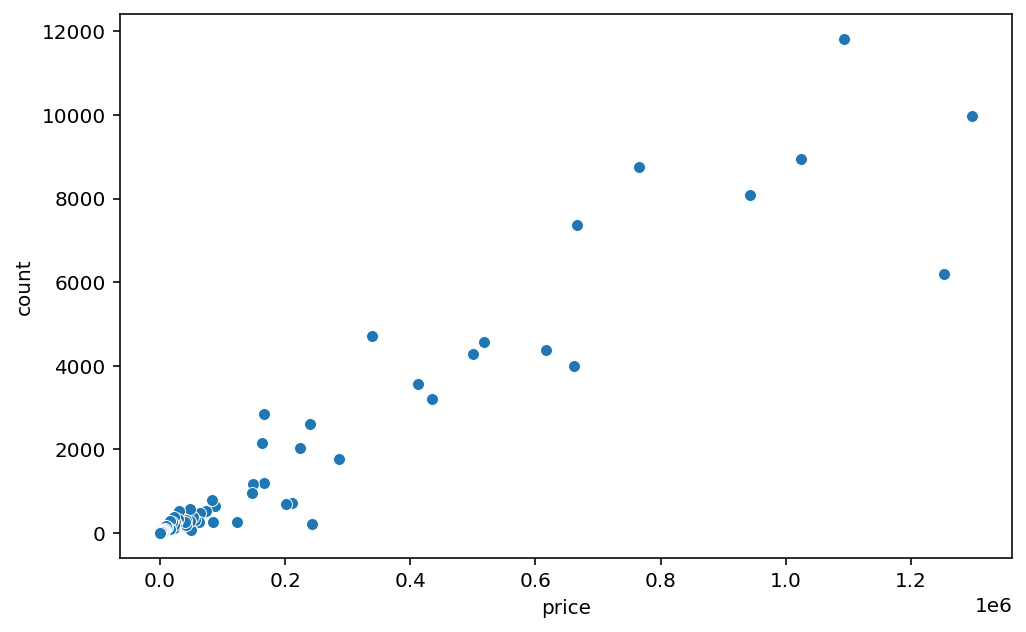

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

sns.scatterplot(data=group_merged, y="count", x="price")
plt.show()


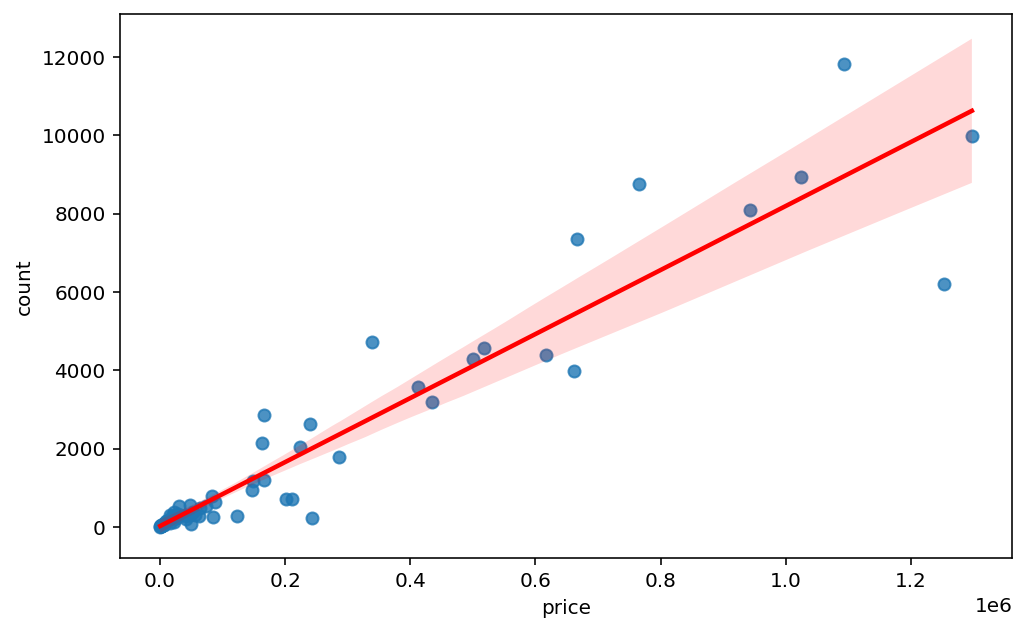

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

sns.regplot(data=group_merged, y="count", x="price", ax=ax, line_kws={'color': 'red'})
plt.show()

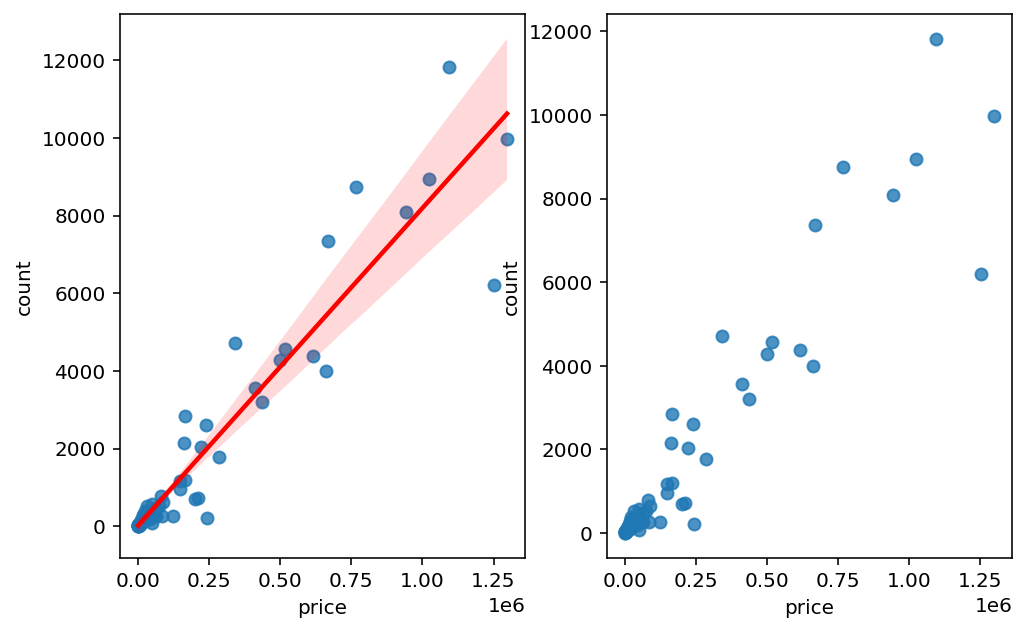

In [86]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(data=group_merged, y="count", x="price", ax=ax1, line_kws={'color': 'red'})
sns.regplot(data=group_merged, y="count", x="price", ax=ax2, fit_reg=False)
plt.show()


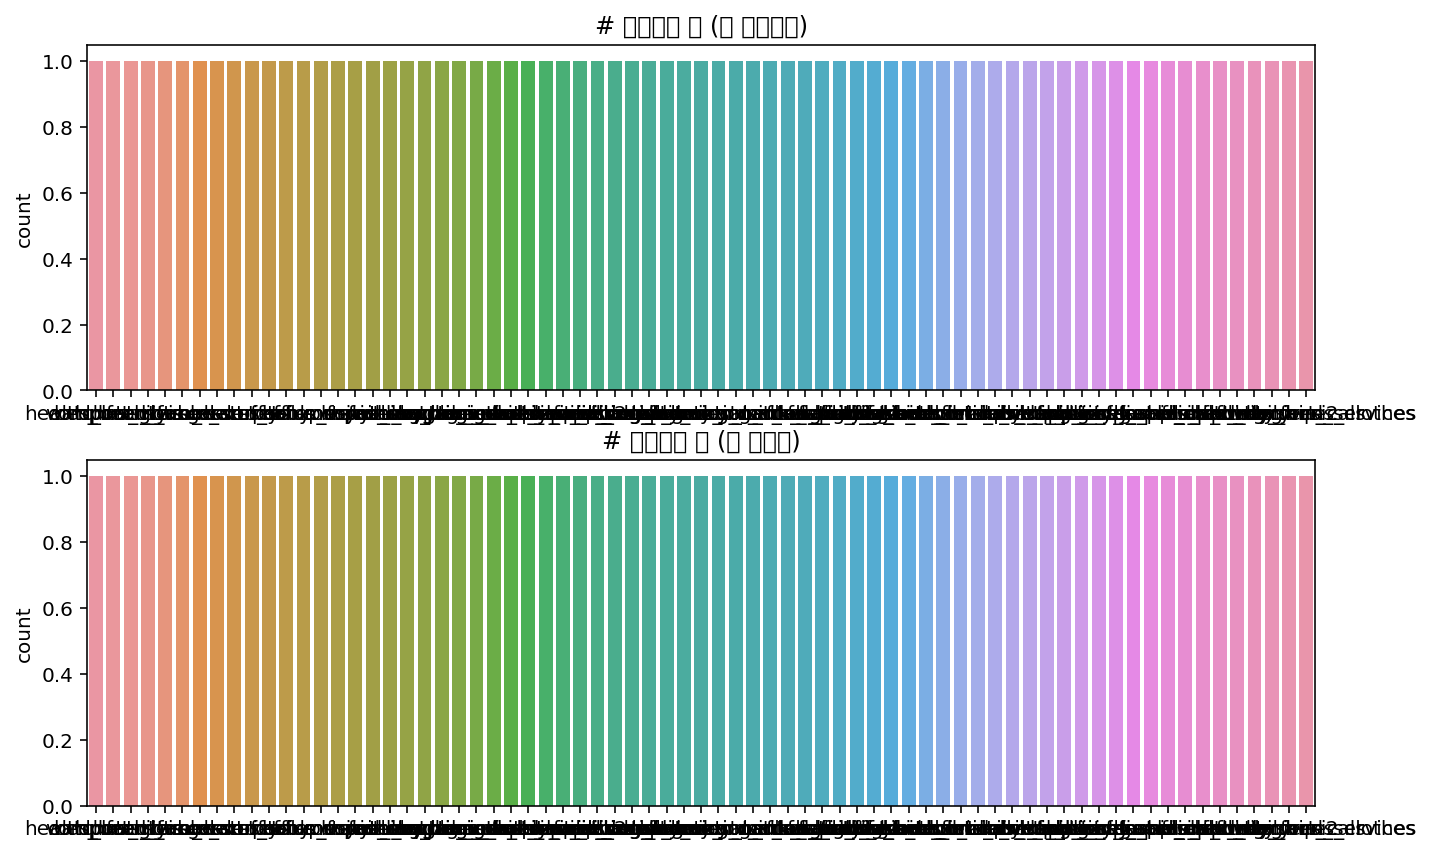

In [63]:
plt.figure(figsize=(11, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=group_merged, x=price_idx).set_xlabel('')
plt.title("# 카테고리 별 (총 주문금액)")

plt.subplot(212)
sns.countplot(data=group_merged, x=price_idx).set_xlabel('')
plt.title("# 카테고리 별 (총 주문량)")

plt.show()

#### &nbsp; &nbsp; ▶ 이동거리 : (merch_lat, merch_long) - (lat, long) &nbsp;→&nbsp; distant (위도, 경도)
#### &nbsp; &nbsp; &nbsp; &nbsp; **하버사인 공식**으로 거리 계산
>- <span style="color:red;">**lat_long_dist(lat, long)**</span><br>
>  &nbsp; where, &nbsp; lat(위도: deg.), &nbsp; long(경도: deg.)

In [57]:
## ◆ 거리 계산 (위도, 경도) : degree → rad.

import math

earth_radius = 6371  # 지구 반지름 [Km]

def lat_long_dist(x, y):
    # 위도와 경도를 라디안으로 변환
    lat1, lat2 = map(math.radians, x)
    lon1, lon2 = map(math.radians, y)
    
    #print(f'({lat1:.5f}, {lat2:.5f}), ({lon1:.5f}, {lon2:.5f})')

    
    # 위도와 경도의 차이 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # 하버사인 공식 계산
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # 거리 계산
    distance = earth_radius * c
    return round(distance, 2)

# [시청 - 강남역] --------------------------------
lati = [37.5665,   37.4979]  # x : 위도 [degree]
long = [126.9780, 127.0276]  # y : 경도 [degree]

#print(f"Distance: {lat_long_dist(lati, long):.2f} Km")
print(f"Distance: {lat_long_dist(lati, long)} Km")

# 【결과 검증】 : 8.79Km  (* Naver : 8.8Km)

Distance: 8.79 Km
